# Prediction de loyer

## Consignes

Reprendre le code du TP de régression linéaire et de tester plusieurs manières d'améliorer la modélisation à l'aide de cette nouvelle observation.

Voici ce qu'on attend de vous :

- une séparation en training / testing set
- 2 propositions d'amélioration du modèle qui obtiennent de meilleures performances que la "baseline" (la régression linéaire avec une seule feature)
- Une sélection d'un modèle final à partir des performances

## Exercice

Les principales étapes de l'exercice sont les suivantes:

- Chargement des donnéees 

In [1]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# On charge le dataset
house_data = pd.read_csv('house_data.csv')

print(len(house_data))

# structure & types
print(house_data.dtypes)

house_data.dropna(inplace=True)

print(len(house_data))

# cast `arrondissement` array en entier 
house_data.arrondissement = house_data.arrondissement.astype(np.int64)

house_data.head()

827
price               int64
surface           float64
arrondissement    float64
dtype: object
822


,price,surface,arrondissement
0,1820,46.1,1
1,1750,41.0,1
2,1900,55.0,1
3,1950,46.0,1
4,1950,49.0,1


In [2]:
house_data.tail()

,price,surface,arrondissement
822,850,35.00,10
823,700,10.00,10
824,1280,34.00,10
825,1545,65.00,10
826,1000,21.43,10


In [3]:
house_data.describe()

,price,surface,arrondissement
count,822.000000,822.000000,822.000000
mean,2010.306569,58.045925,4.142336
std,1895.091794,44.827522,3.202151
min,390.000000,10.000000,1.000000
25%,1052.500000,28.655000,2.000000
50%,1564.500000,46.100000,3.000000
75%,2348.000000,73.000000,4.000000
max,25000.000000,415.000000,10.000000


In [4]:
tmp = house_data.pivot_table('price', index='surface',
                     columns='arrondissement')

print(tmp.values)
tmp.head()

[[   nan    nan  1100.    nan   545.]
 [   nan    nan   402.    nan    nan]
 [   nan    nan   519.    nan    nan]
 ...
 [ 5950.    nan    nan    nan    nan]
 [14980.    nan    nan    nan    nan]
 [   nan    nan    nan 25000.    nan]]


arrondissement,1,2,3,4,10
surface,,,,,
10.00,NaN,NaN,1100.0,NaN,545.0
10.10,NaN,NaN,402.0,NaN,NaN
11.70,NaN,NaN,519.0,NaN,NaN
12.00,650.0,NaN,NaN,NaN,515.0
12.01,NaN,NaN,600.0,NaN,NaN


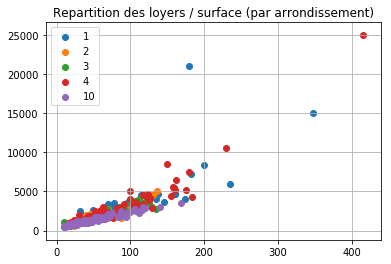

In [5]:
%matplotlib inline

fig = plt.figure()

plt.grid(True)
plt.title("Repartition des loyers / surface (par arrondissement)")

plt.xlabel('surface')
plt.ylabel('loyer')

plt.scatter(tmp.index, tmp[1].values, label='1')
plt.scatter(tmp.index, tmp[2].values, label='2')
plt.scatter(tmp.index, tmp[3].values, label='3')
plt.scatter(tmp.index, tmp[4].values, label='4')
plt.scatter(tmp.index, tmp[10].values, label='10')

plt.legend()
plt.show()

## Elimination des valeurs

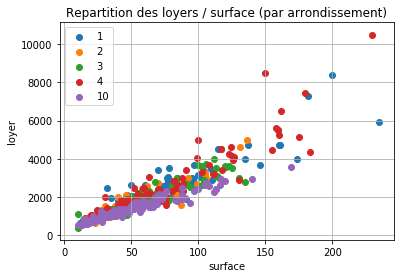

In [10]:
house_data = house_data[house_data['price'] < 12000]

tmp = house_data.pivot_table('price', index='surface',
                     columns='arrondissement')

%matplotlib inline

fig = plt.figure()

plt.grid(True)
plt.title("Repartition des loyers / surface (par arrondissement)")

plt.xlabel('surface')
plt.ylabel('loyer')

plt.scatter(tmp.index, tmp[1].values, label='1')
plt.scatter(tmp.index, tmp[2].values, label='2')
plt.scatter(tmp.index, tmp[3].values, label='3')
plt.scatter(tmp.index, tmp[4].values, label='4')
plt.scatter(tmp.index, tmp[10].values, label='10')

plt.legend()
plt.show()

## Séparation en training / testing set

Nous choisissons de séparer les données avec les proportions suivantes : 80 % pour le training set et 20 % pour le testing set.

In [14]:
from sklearn.model_selection import train_test_split

x = house_data
y = house_data.price

X_train, X_test, y_train, y_test = train_test_split(house_data, house_data.price,
                                                    train_size=0.8, test_size=0.2)

In [15]:
X_train.head()

,price,surface,arrondissement
702,1100,34.0,10
681,800,21.0,10
821,795,25.0,10
368,950,29.0,3
569,1690,56.0,4


In [19]:
from sklearn import linear_model

# fit a model

lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


print(model)
print(y_test, predictions)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[2485. 1750. 1640. 2500. 3750. 2500.  830. 1850. 3200. 2180. 1177. 3020.
 1150. 1000. 2200. 3040. 1375. 1150. 1500. 2371.  950. 1101. 2536.  900.
  754. 1650. 4340. 1150. 2100. 3587.  800. 2300. 1921. 2375. 1850. 2700.
 1160. 2750. 1700. 2320. 1430. 1050. 1670.  550. 1100. 1250. 1275. 2090.
  950.  890. 1100.  899. 3400. 2780. 1180.  715. 3250. 2650.  750. 1375.
  795. 1800.  860. 1820. 1280. 1605. 1945. 1462. 1835. 2900. 1250. 1700.
  750. 1590. 3000. 1667. 1246.  712. 3400. 5000. 2310. 1138. 2280. 2212.
 1280. 1770. 2100. 1280. 1176.  784. 5950. 2500. 3000. 4600.  550. 2216.
 1750. 1000. 1423. 1200. 3000. 1100.  850. 1290. 1950. 1000. 1350. 1500.
 3000. 4600. 2309. 3480. 2100. 1002. 2970. 3900. 2614.  945. 1530. 3000.
 1450. 1185. 2300. 1060. 5500. 1995. 1295. 1250. 1140.  570. 1375. 1333.
 1200.  799. 1624.  930. 2614. 2955.  969.  647. 1350. 5000. 1000. 2155.
 1400. 3000. 3000. 2382. 1400. 1450

No handles with labels found to put in legend.


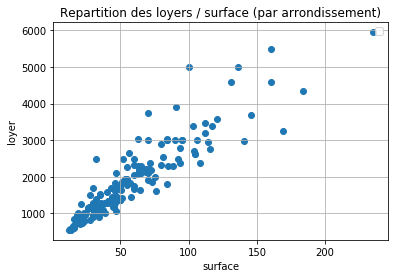

In [22]:
%matplotlib inline

fig = plt.figure()

plt.grid(True)
plt.title("Repartition des loyers / surface (par arrondissement)")

plt.xlabel('surface')
plt.ylabel('loyer')

plt.scatter(X_test.surface, predictions)
# plt.scatter(tmp.index, tmp[1].values, label='1')
# plt.scatter(tmp.index, tmp[2].values, label='2')
# plt.scatter(tmp.index, tmp[3].values, label='3')
# plt.scatter(tmp.index, tmp[4].values, label='4')
# plt.scatter(tmp.index, tmp[10].values, label='10')

plt.legend()
plt.show()

Que se passe-t-il si : 

on change l’hypothèse de linéarité (une droite) et qu’on en prend une autre (un polynôme du second degré par exemple) ?

on teste le modèle avec d’autres types d’erreurs que la distance euclidienne ?

on ajoute des features (dimensions) supplémentaires en entrée ?

au fur et à mesure que la surface augmente, les données ont l'air d'être de plus en plus "éparses" : comment intégrer ce comportement dans ma modélisation ?